# Instrucciones
Resuelve de manera individual los siguientes ejercicios en un cuaderno de Jupyter Notebook y responde a los planteamientos indicados en cada uno. Los conjuntos de datos con los que trabajarás así como algunos incisos de los ejercicios dependen de tu número de matrícula.

## Ejercicio 1 (35 puntos)
El conjunto de datos de criminalidad de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

- **VR** = crímenes violentos por cada 100000 habitantes
- **MR** = asesinatos por cada 100000 habitantes
- **M** = porcentaje de áreas metropolitanas
- **W** = porcentaje de gente blanca
- **H** = porcentaje de personas con preparatoria terminada
- **P** = porcentaje con ingresos por debajo del nivel de pobreza
- **S** = porcentaje de familias con solo un miembro adulto como tutor

Para este conjunto de datos:

1. Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.
2. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:
   - ¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?
   - ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

**Nota:** Las variables con las que vas a trabajar dependen del último número de tu matrícula de acuerdo a la siguiente lista:

- **0** - Variable dependiente VR, variables independientes M, W, H y P
- **1** - Variable dependiente VR, variables independientes M, W, H y S
- **2** - Variable dependiente VR, variables independientes M, W, S y P
- **3** - Variable dependiente VR, variables independientes M, H, S y P
- **4** - Variable dependiente MR, variables independientes M, W, H y P
- **5** - Variable dependiente MR, variables independientes M, W, H y S
- **6** - Variable dependiente MR, variables independientes M, W, S y P
- **7** - Variable dependiente MR, variables independientes M, H, S y P
- **8** - Variable dependiente VR, variables independientes M, W, H, P y S
- **9** - Variable dependiente MR, variables independientes M, W, H, P y S



In [4]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/crime_data.csv')

df.head()


,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [ ]:
df = df.drop(columns=['VR', 'S'])

In [ ]:
df.head()

,State,MR,M,W,H,P
0,AK,9.0,41.8,75.2,86.6,9.1
1,AL,11.6,67.4,73.5,66.9,17.4
2,AR,10.2,44.7,82.9,66.3,20.0
3,AZ,8.6,84.7,88.6,78.7,15.4
4,CA,13.1,96.7,79.3,76.2,18.2


In [ ]:
print(df[['M', 'W', 'H', 'P', 'MR']].corr())


           M         W         H         P        MR
M   1.000000 -0.337435 -0.003977 -0.060538  0.316114
W  -0.337435  1.000000  0.338121 -0.389135 -0.706259
H  -0.003977  0.338121  1.000000 -0.743938 -0.286071
P  -0.060538 -0.389135 -0.743938  1.000000  0.565871
MR  0.316114 -0.706259 -0.286071  0.565871  1.000000


# Perceptrón multicapa

In [ ]:
X = df[['M', 'W', 'H', 'P']]
y = df['MR']


mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(mlp, X, y, cv=kf)


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 87.43
R^2 Score: 0.22


#Regresión lineal

In [ ]:
X = df[['M', 'W', 'H', 'P']]
y = df['MR']


lr = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)


y_pred = cross_val_predict(lr, X, y, cv=kf)


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


print(f'Mean Squared Error (Regresión Lineal): {mse:.2f}')
print(f'R^2 Score (Regresión Lineal): {r2:.2f}')

Mean Squared Error (Regresión Lineal): 74.77
R^2 Score (Regresión Lineal): 0.34


#Preguntas

## Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?


No, el modelo perceptrón multicapa no es efectivo para el conjunto de datos dado, nuestro R2 es muy baja, lo que sugiere que nuestro modelo no esta capturando adecuadamente las relaciones que existen entre nuestras variables. Probablemente se deba a que las relaciones entre las variables no son lo suficientemente complejas para que un modelo no lineal como el perceptrón multicapa tenga ventaja.

##¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

Comparando estos dos modelos, podemos darnos cuenta que el lineal es un poco mejor por la R2 y el MSE que arroja esto sugiere que los datos siguen una relacion "linea", sin embargo ninguno de los modelos tiene un buen ajuste. Esto puede deberse a la correlación de las variables, ya que presentan correlación débil.

# Ejercicio 2 (35 puntos)

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posibles: Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse. Al igual que en el ejercicio anterior, los datos se cargan con la función `loadtxt` de numpy. La primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

1. Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.
2. Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red.
3. Prepara el modelo perceptrón multicapa:
   - Obtén los hiperparámetros óptimos de capas y neuronas de la red.
   - Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

Contesta lo siguiente:

- ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.
- ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?



In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import numpy as np


In [73]:
df = np.loadtxt('sample_data/M_3.txt')

In [72]:
df.shape[1]

631

In [71]:
usecols = [0] + list(range(2, 632))


df = np.loadtxt('sample_data/M_3.txt', delimiter='\t',usecols=usecols)


y = df[:, 0]
X = df[:, 1:]


In [74]:
print(X)

[[-1.55867656  1.10831223  0.36259013 ...  0.29210038 -0.43529413
   1.38408176]
 [-1.97820748  0.05529825 -0.27335023 ...  0.13460537 -0.66363906
   1.23454479]
 [-2.00252079  0.26738123  0.26316986 ...  0.20743235 -0.56334261
   1.04644538]
 ...
 [-4.94456697 -6.99475503 -5.09065357 ... -1.32610563 -0.60156025
  -5.29772693]
 [-3.65328964 -7.63221775 -4.1068933  ... -1.68888044 -0.2974711
  -5.37944   ]
 [-4.6666576  -7.71443058 -4.91212317 ... -1.74725351 -0.37124767
  -5.16867606]]


# Modelo con una Red de al menos 5 capas de 20 neouronas

In [76]:
model = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=10000, random_state=42)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Accuracy (5 capas de 20 neuronas): {scores.mean():.2f}')


Accuracy (5 capas de 20 neuronas): 0.94


# Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando el número óptimo de capas y neuronas de la red,Obtén los hiperparámetros óptimos de capas y neuronas de la red, y Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [ ]:
print("Training model with two layers of 100")
model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=10000, random_state=42)
model.fit(X, y)

y_pred = cross_val_predict(model, X, y, cv=5)
print(classification_report(y, y_pred))

Training model with two layers of 100
              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98        90
         2.0       0.93      1.00      0.96        90
         3.0       0.93      0.90      0.92        90
         4.0       1.00      0.99      0.99        90
         5.0       0.99      0.99      0.99        90
         6.0       0.90      0.92      0.91        90
         7.0       0.93      0.90      0.92        90

    accuracy                           0.95       630
   macro avg       0.95      0.95      0.95       630
weighted avg       0.95      0.95      0.95       630



In [ ]:
num_layers = np.arange(1, 20, 5)
num_neurons = np.arange(10, 110, 20)


layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l*[n])


grid_search = GridSearchCV(MLPClassifier(max_iter=10000, random_state=42),{'hidden_layer_sizes': layers}, cv=5)
grid_search.fit(X, y)
print("Numero optimo")
print(grid_search.best_estimator_)

Numero optimo
MLPClassifier(hidden_layer_sizes=[90, 90, 90, 90, 90, 90], max_iter=10000,
              random_state=42)


In [ ]:
grid_search = GridSearchCV(MLPClassifier(max_iter=10000), {'hidden_layer_sizes': layers}, cv = 5)
y_pred = cross_val_predict(grid_search, X, y, cv = 5)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95        90
         2.0       0.96      0.94      0.95        90
         3.0       0.82      0.87      0.84        90
         4.0       0.99      1.00      0.99        90
         5.0       1.00      0.96      0.98        90
         6.0       0.89      0.90      0.90        90
         7.0       0.93      0.86      0.89        90

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



#Preguntas

## ¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.


Si,siento que la optimizacion si ayudo a mejorar el modelo, no tan drasticamente como lo esperaba, pero esto se debe a que desde un inicio con la primer prueba de 5 redes con 20 neuronas ya tuvo un modelo bastante bueno, sin embargo la optimizacion si mejor.

## ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

En cuanto a los inconvenientes que podemos encontrar es el tiempo de cómputo, complejidad del modelo y un sobreajuste. Pude darme cuenta de que duro un rato (tampoco muchísimo) pero supongo que tiene que ver con la cantidad de datos y el tipo de libertad que le das en cuento a número de neuronas y redes.

# **Ejercicio 3: Modelo Perceptrón Multicapa (30 puntos)**

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función `loadtxt` de numpy.

- La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace.
- La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

## Para tu conjunto de datos:

1. **Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico**, y evalúalo con validación cruzada. Para este caso, es necesario que encuentres la gráfica de Época vs Exactitud.
   
2. **Repite el paso anterior**, pero utilizando descenso de gradiente por **lote** y de **mini-lote** para entrenar el modelo.

3. **Evalúa un modelo perceptrón multicapa** con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.

4. **Contesta las siguientes preguntas:**
   - ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?
   - ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?


### Notas:

- Utiliza las técnicas de validación cruzada para evaluar los modelos en todos los pasos.
- Recuerda ajustar correctamente los hiperparámetros como el número de épocas, el tamaño del lote y mini-lote.
- Los modelos de perceptrón multicapa pueden ser ajustados en scikit-learn, Keras o Pytorch.


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from collections import Counter

In [43]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_predict
from imblearn.under_sampling import RandomUnderSampler

In [44]:
df = np.loadtxt('sample_data/P1_3.txt')

In [49]:
df.shape[1]

154

In [64]:
usecols = [0] + list(range(2, 155))


df = np.loadtxt('sample_data/P1_3.txt', delimiter='\t',usecols=usecols)


y = df[:, 0]
X = df[:, 1:]


In [50]:
print(X)

[[ 0.3925073   0.67657019  0.60180412 ...  1.24975793  1.03738802
   1.05531121]
 [-1.31487611 -0.73287418  0.41422541 ... -0.61989557 -1.05137325
  -1.19338103]
 [-1.09345032 -0.68931183  0.07082691 ... -0.29226011 -0.2000579
   0.28090627]
 ...
 [-0.72853565 -0.78422092  0.02350863 ... -0.00920863  0.12140923
   0.39523656]
 [ 1.77147543  0.83735529  0.18184615 ... -0.45705499 -1.52412392
  -1.73872657]
 [ 0.47996947 -0.54432989 -0.75249618 ... -0.18374824 -0.69901401
  -1.41618733]]


## Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para este caso, es necesario que encuentres la gráfica de Época vs Exactitud.

{'w': array([ 0.4873273 , -0.48517195, -0.21791816, -0.33837987,  0.47322275,
       -0.85919062, -0.1489616 ,  0.49559595, -0.43889595,  0.60636907,
       -0.43491609, -0.35393436,  0.82705828, -0.75306357, -0.41349917,
       -0.3472814 , -0.22688386,  0.32331305,  0.03102185, -0.58806848,
        0.74006299, -0.72975993, -0.25149558,  0.43225025, -0.86201282,
        0.18575097,  0.55579068, -0.52976854, -0.35311832,  0.43448129,
        0.34841943, -0.48573985, -0.75937849,  0.57729253, -0.23978226,
        0.1037121 , -0.306495  ,  0.26852966, -0.29008213, -0.12636352,
       -0.38592482, -0.29980609,  0.71078247, -0.29024682, -0.40748964,
       -0.55658191,  0.94763556,  0.0141024 , -0.53109311,  0.03104743,
        0.06384465, -0.46552314,  0.0148448 ,  0.38773272, -0.67399304,
        1.03449736, -0.31408171,  0.08324109, -0.01739386, -0.19319616,
       -0.45913148,  0.06506698, -0.64776745,  0.44390185,  0.69788845,
        0.49008513, -0.76670874,  0.62777442, -0.3363373 ,

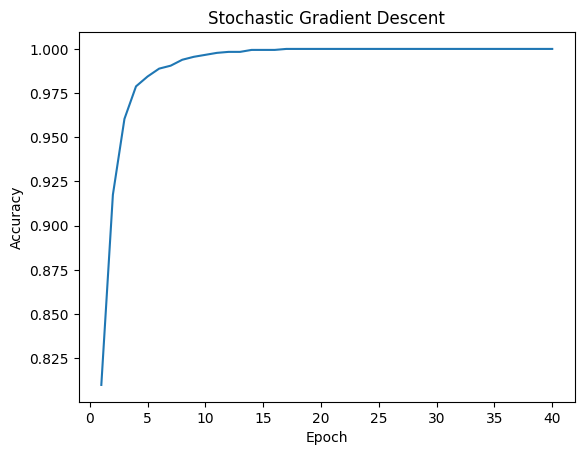

Cross-Validated Accuracy (SGD): 0.986064556176288


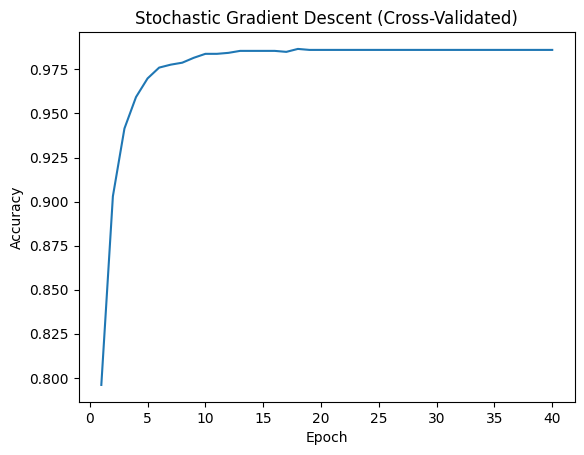

In [70]:
n = X.shape[0]
nf = X.shape[1] + 1

X = np.hstack((X, np.ones((n, 1))))
y[y == 1] = -1
y[y == 2] = 1


def perceptron(X, w):
    ws = np.sum(X * w)
    return -1 if ws < 0 else 1


def perceptron_mult(X, w):
    return np.array([perceptron(xi, w) for xi in X])


def train_perceptron_sg(X, y, X_test=None, y_test=None, n_epochs=20, alpha=0.001):
    n = X.shape[0]
    n_features = X.shape[1]
    w = 2 * np.random.rand(n_features) - 1
    epoch_acc = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        for index in indices:
            yp = perceptron(X[index, :], w)
            w += alpha * (y[index] - yp) * X[index, :]

        if X_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(X_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    if X_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w': w, 'acc': epoch_acc[-1], 'epoch_acc': epoch_acc}
    return {'w': w}


n_epochs = 40
alpha = 0.001

model = train_perceptron_sg(X, y, X_test=X, y_test=y, n_epochs=n_epochs, alpha=alpha)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Stochastic Gradient Descent")
plt.show()


nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle=True)
acc = 0
epoch_acc = np.zeros(n_epochs)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    model = train_perceptron_sg(X_train, y_train, X_test=X_test, y_test=y_test, n_epochs=n_epochs, alpha=alpha)
    acc += model['acc']
    epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print("Cross-Validated Accuracy (SGD):", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Stochastic Gradient Descent (Cross-Validated)")
plt.show()

## Repite el paso anterior, pero utilizando descenso de gradiente por lote y de mini-lote para entrenar el modelo.

{'w': array([-4.90223421e-01,  6.00981519e-01, -3.83948422e-01, -7.52092518e-01,
       -3.71587480e-01,  4.19121939e-01,  6.33463771e-01, -7.01208959e-01,
       -8.31375957e-02, -6.47566143e-01,  6.86656927e-01, -3.20153196e-01,
       -3.64514444e-01, -3.21868506e-01,  3.93402478e-01, -3.33462985e-01,
       -1.43045502e-01,  6.46494418e-01, -1.75636711e-01, -2.79511523e-01,
       -6.34748702e-01,  5.14645274e-02,  4.13404177e-01, -2.66238719e-01,
        3.11646755e-01,  6.18580470e-01, -7.04442225e-01,  8.38728244e-01,
       -5.09232330e-01, -2.31222155e-01, -2.89897010e-01, -6.19096169e-01,
        7.03360642e-01,  1.96876758e-01, -5.01816544e-01, -5.19827952e-01,
        1.87940356e-01,  6.55808045e-01, -9.38985361e-01,  2.91634630e-01,
        4.95527416e-01,  4.78459695e-01, -4.77911990e-01, -7.60919113e-01,
        1.07959028e+00, -6.24770825e-01, -1.37501137e-01,  5.42852992e-01,
       -5.40404954e-01,  7.70622680e-01,  1.05467526e-01, -7.37039379e-01,
       -1.62299961e

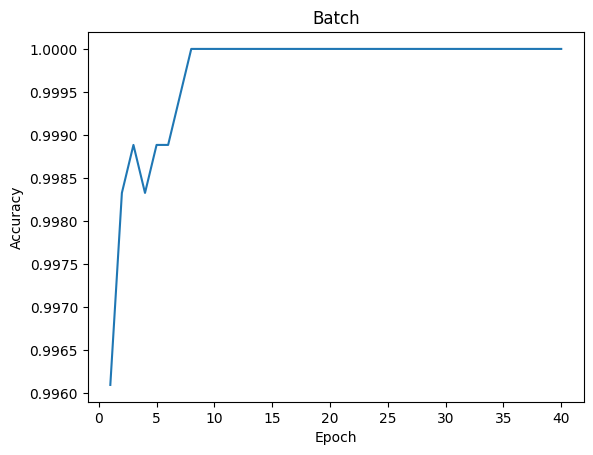

Cross-Validated Accuracy (Batch): 0.9955400372439479


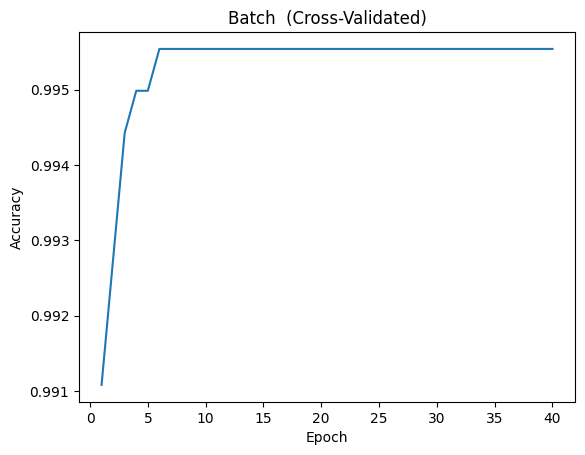

In [21]:
def train_perceptron_batch(X, y, X_test=None, y_test=None, n_epochs=20, alpha=0.001):
    n = X.shape[0]
    n_features = X.shape[1]
    w = 2 * np.random.rand(n_features) - 1
    epoch_acc = []

    for epoch in range(n_epochs):
        grad = np.zeros(n_features)
        for i in range(n):
            yp = perceptron(X[i, :], w)
            grad += (y[i] - yp) * X[i, :]
        w += alpha * grad

        if X_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(X_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    if X_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w': w, 'acc': epoch_acc[-1], 'epoch_acc': epoch_acc}
    return {'w': w}


n_epochs = 40
alpha = 0.001

model = train_perceptron_batch(X, y, X_test=X, y_test=y, n_epochs=n_epochs, alpha=alpha)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Batch")
plt.show()


nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle=True)
acc = 0
epoch_acc = np.zeros(n_epochs)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    model = train_perceptron_batch(X_train, y_train, X_test=X_test, y_test=y_test, n_epochs=n_epochs, alpha=alpha)
    acc += model['acc']
    epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print("Cross-Validated Accuracy (Batch):", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Batch  (Cross-Validated)")
plt.show()


{'w': array([ 3.50100518e-01,  6.91508269e-01, -1.69590317e-01, -4.56690158e-01,
        2.87051836e-01, -7.68233171e-01,  1.33059184e-02,  3.03231840e-02,
       -2.57865369e-02, -5.32974788e-01,  6.79691769e-01,  6.14541820e-01,
       -4.53714174e-01,  2.58616976e-01, -5.19462826e-01,  1.05435834e-01,
        5.96143183e-01, -1.03988086e-01, -5.75413249e-01,  1.50602298e-02,
        3.05693405e-01, -3.15229079e-02,  9.69607232e-02, -5.19645494e-01,
        9.33052345e-01, -5.59335040e-01, -3.42159479e-01,  5.50723866e-01,
       -2.33347070e-01,  7.11378006e-01, -1.69149754e-01, -4.90640529e-02,
       -1.64355826e-01, -3.21395919e-01, -4.46882630e-01, -3.78363765e-01,
        2.45533676e-01,  1.46687351e-01,  7.52358713e-01, -5.26379961e-01,
        8.67667324e-02, -2.52022672e-01, -1.39695060e-01,  3.80688988e-01,
        4.37278519e-01, -7.27786969e-01,  1.96727977e-01, -3.27213713e-01,
        5.85593093e-01,  1.86655231e-01, -5.30372226e-01, -2.63031022e-01,
       -3.46218619e

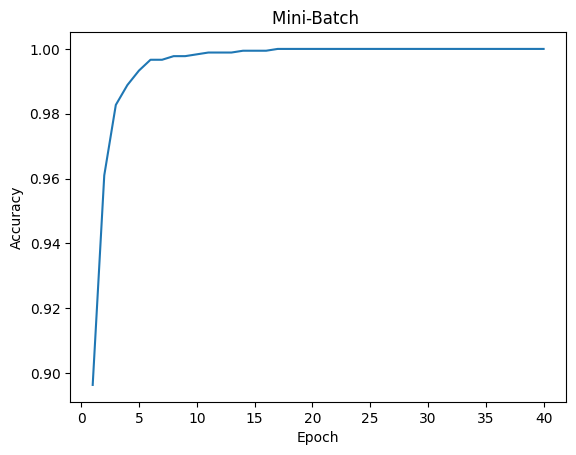

Cross-Validated Accuracy (Mini-Batch): 0.9838237119801365


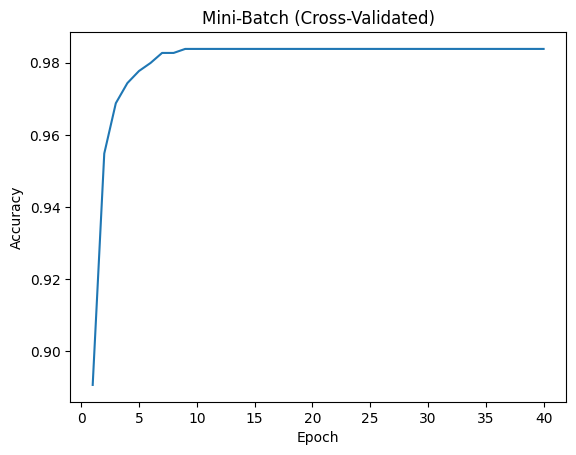

In [22]:
def train_perceptron_mini_batch(X, y, X_test=None, y_test=None, n_epochs=20, alpha=0.001, batch_size=5):
    n = X.shape[0]
    n_features = X.shape[1]
    w = 2 * np.random.rand(n_features) - 1
    n_updates = n // batch_size + int(n % batch_size > 0)
    epoch_acc = []

    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        j = 0
        for i in range(n_updates):
            grad = np.zeros(n_features)
            counter = 0
            for b in range(batch_size):
                if j >= n:
                    continue
                yp = perceptron(X[indices[j], :], w)
                grad += (y[indices[j]] - yp) * X[indices[j], :]
                counter += 1
                j += 1
            w += alpha * grad

        if X_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(X_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    if X_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w': w, 'acc': epoch_acc[-1], 'epoch_acc': epoch_acc}
    return {'w': w}


n_epochs = 40
alpha = 0.001
batch_size = 5

model = train_perceptron_mini_batch(X, y, X_test=X, y_test=y, n_epochs=n_epochs, alpha=alpha, batch_size=batch_size)
print(model)

plt.plot(np.arange(1, n_epochs+1, 1), model['epoch_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Mini-Batch ")
plt.show()


nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle=True)
acc = 0
epoch_acc = np.zeros(n_epochs)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    model = train_perceptron_mini_batch(X_train, y_train, X_test=X_test, y_test=y_test, n_epochs=n_epochs, alpha=alpha, batch_size=batch_size)
    acc += model['acc']
    epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print("Cross-Validated Accuracy (Mini-Batch):", acc)

plt.plot(np.arange(1, n_epochs+1, 1), epoch_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Mini-Batch (Cross-Validated)")
plt.show()


## Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch. y Blanceo

In [57]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


y_pred = np.zeros_like(y)


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    undersample = RandomUnderSampler(sampling_strategy={2: 298}, random_state=42)
    X_res, y_res = undersample.fit_resample(X_train, y_train)

    class_counts_resampled = Counter(y_res)
    print(f"Balance de clases después del submuestreo en el pliegue actual:")
    print(class_counts_resampled)

    model.fit(X_res, y_res)


    y_pred[test_index] = model.predict(X_test)


matriz_confusion = confusion_matrix(y, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

print("\nReporte de Clasificación:")
print(classification_report(y, y_pred))

Balance de clases después del submuestreo en el pliegue actual:
Counter({2.0: 298, 1.0: 246})
Balance de clases después del submuestreo en el pliegue actual:
Counter({2.0: 298, 1.0: 239})
Balance de clases después del submuestreo en el pliegue actual:
Counter({2.0: 298, 1.0: 219})
Balance de clases después del submuestreo en el pliegue actual:
Counter({2.0: 298, 1.0: 247})
Balance de clases después del submuestreo en el pliegue actual:
Counter({2.0: 298, 1.0: 241})
Matriz de Confusión:
[[ 239   59]
 [ 220 1276]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         1.0       0.52      0.80      0.63       298
         2.0       0.96      0.85      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.74      0.83      0.77      1794
weighted avg       0.88      0.84      0.86      1794



#Preguntas

## ¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?


Por lo general un modelo de una neouran es suficiente para problmeas de clasificacion linealmente seprabales. Pero si el conjkunto de datos presenta una complejidad mayor, como la prresncia de relaciones no lineales entre las caracaterisitcas y las etiquetas, este podria no ser suficiente.

## ¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

Dentro de los inconvenientes a presentarlo por encuentra un tamaño óptimo, yo creo que los más a considerar son, el sobre ajuste, ya que el modelo puede aprender demasiado bien los detalles específicos del conjunto de entrenamiento, incluyendo el ruido, esto lleva  aún rendimiento deficiente en datos no vistos.


también el costo computacional.